<h2 id="understanding_data">Understanding the Data</h2>

### `ConcreteCompressiveStrength.csv`:
<pre>
<b>
Task:
<code>Predict the compressive strenght(the resistance of a material to breaking under compression) of concrete based on its composition and its age</code>
For a construction company that wants to improve the quality of their civil construction projects and also to build a good reputation.
<b><code>Why?</code></b>
    # To determine that the concrete mixture as delivered meets the requirements of the specified strength in the job contract document.
        
Concrete compressive strength requirements can vary from 17 MPa for residential concrete to 28 MPa and higher in commercial structures. Higher strengths up to and exceeding 70 MPa are specified for certain applications. ~<a href='https://www.nevadareadymix.com/'>Nevada Ready Mix</a>


Dataset Description:
The dataset has the following input features
    Cement: kg per m^3
    Blast_Furnace_Slag: kg per m^3
    Fly_Ash: kg per m^3
    Water: kg per m^3
    Superplasticizer: kg per m^3
    Coarse_Aggregate: kg per m^3
    Fine_Aggregate: kg per m^3
    Age: in days

The output feature is
        Concrete_compressive_strength: MPa(megapascals)
     </b>   
<pre>

### Importing Needed packages

In [18]:
%reset -f

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

from scipy.stats import spearmanr
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

<h2 id="reading_data">Reading the data</h2>

In [2]:
data = pd.read_csv("ConcreteCompressiveStrength.csv")

# take a look at the dataset
data.head()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [20]:
data.iloc[data.Age.argmin()]

Cement                            500.00
Blast_Furnace_Slag                  0.00
Fly_Ash                             0.00
Water                             200.00
Superplasticizer                    0.00
Coarse_Aggregate                 1125.00
Fine_Aggregate                    613.00
Age                                 1.00
Concrete_compressive_strength      12.64
Name: 746, dtype: float64

In [21]:
data.Age.value_counts()

28     425
3      134
7      126
56      91
14      62
90      54
100     52
180     26
91      22
365     14
270     13
360      6
120      3
1        2
Name: Age, dtype: int64

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         1030 non-null   float64
 1   Blast_Furnace_Slag             1030 non-null   float64
 2   Fly_Ash                        1030 non-null   float64
 3   Water                          1030 non-null   float64
 4   Superplasticizer               1030 non-null   float64
 5   Coarse_Aggregate               1030 non-null   float64
 6   Fine_Aggregate                 1030 non-null   float64
 7   Age                            1030 non-null   int64  
 8   Concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [26]:
data.describe()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


__Checking if there is any linear relaionship b/w `Concrete_compressive_strength` and other variables using Spearmans correlation coeficient__

In [24]:
def check_corr(column):
    corr, _ = spearmanr(data[[column]], data[['Concrete_compressive_strength']])
    print(f'Spearmans correlation: for {column} = {corr}')
    
corr = pd.Series(data.columns[:-1]).apply(check_corr)    

Spearmans correlation: for Cement = 0.4776143065003231
Spearmans correlation: for Blast_Furnace_Slag = 0.16410546676296717
Spearmans correlation: for Fly_Ash = -0.07782971890884373
Spearmans correlation: for Water = -0.3084139699115922
Spearmans correlation: for Superplasticizer = 0.34778637298702414
Spearmans correlation: for Coarse_Aggregate = -0.18354244378833753
Spearmans correlation: for Fine_Aggregate = -0.17996203988452888
Spearmans correlation: for Age = 0.5960276340337732


__Data Spliting__

In [3]:
features = data.drop(['Concrete_compressive_strength'], axis=1)
labels = data[['Concrete_compressive_strength']]
train_x, test_x, train_y, test_y = train_test_split(features,labels, test_size=0.2, random_state=3)

In [4]:
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((824, 8), (206, 8), (824, 1), (206, 1))

#### Testing Sample

In [5]:
test_x.head(5)

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age
949,148.1,0.0,136.6,158.1,16.1,1001.8,830.1,28
1020,288.4,121.0,0.0,177.4,7.0,907.9,829.5,28
958,259.9,100.6,78.4,170.6,10.4,935.7,762.9,28
555,181.9,272.8,0.0,185.7,0.0,1012.4,714.3,28
175,362.6,189.0,0.0,164.9,11.6,944.7,755.8,91


In [6]:
stdScaler = StandardScaler()
stdScaler.fit(train_x)

train_x = stdScaler.transform(train_x)
test_x = stdScaler.transform(test_x)

#### __Model__

In [26]:
randfr = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=120, max_features=3, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1800, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
randfr.fit(train_x, train_y)

y_hat_train = randfr.predict(train_x)
y_hat_test = randfr.predict(test_x)

/home/petec0x0/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


#### Result

In [27]:
y_hat_test[:5]

array([19.96458333, 41.36518889, 46.13808444, 31.70772778, 78.88193333])

#### Performance

In [29]:
print('\nTrain Score:', round(r2_score(y_true=train_y, y_pred=y_hat_train), 4))
print('\nTest Score:', round(r2_score(y_true=test_y, y_pred=y_hat_test), 4))


Train Score: 0.9853

Test Score: 0.9271


#### __Let make some business decision__

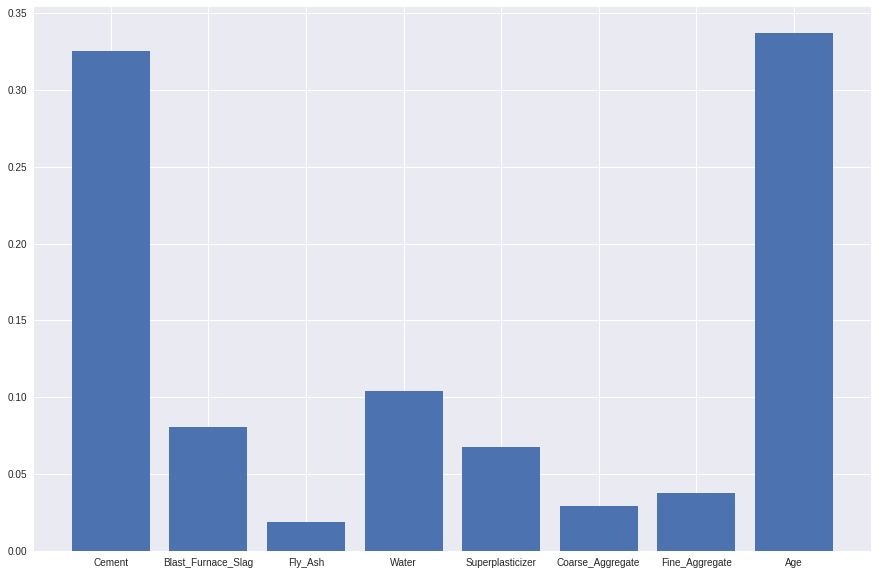

In [40]:
coer = randfr.feature_importances_

col_coe = list(zip(features.columns, coer))

XX = [i[0] for i in col_coe]
yy = [i[1] for i in col_coe]

plt.figure(figsize=(15,10))
plt.bar(XX,yy)
plt.show()

<center><h1>QUESTION?</h1></center>